# Notebook to do data analysis on the NLP data in the Portland Data Science Group

Importing CSV, Pandas, Ipython display to display pandas dataframes, nltk, matplotlib

In [1]:
import csv
import pandas as pd
from IPython.display import display
import nltk 
import matplotlib.pyplot as plt
import numpy as np

Read in the data as pandas dataframe

In [2]:
toxicity_annotations_unanimous_df = pd.read_table('toxicity_annotations_unanimous.tsv')
toxicity_annotations_comments_unanimous_df = pd.read_table('toxicity_annotated_comments_unanimous.tsv')
toxicity_annotations_df = pd.read_table('toxicity_annotations.tsv')
toxicity_annotations_comments_df = pd.read_table('toxicity_annotated_comments.tsv')

Merge the two tables into one by computing a median score and determining toxicity of comments

In [3]:
#Comput mean and median scores from annotations dataset
toxicity_annotations_comments_df["mean_score"] = pd.Series(toxicity_annotations_df.groupby("rev_id",as_index=False).mean()["toxicity_score"])
toxicity_annotations_comments_df["median_score"] = pd.Series(toxicity_annotations_df.groupby("rev_id",as_index=False).median()["toxicity_score"])
# create binary variable toxicity: if median score < 0, toxicity=1, otherwise 0
toxicity_annotations_comments_df["toxicity"] = (toxicity_annotations_comments_df["median_score"] < 0).astype(int)

#display (toxicity_annotations_comments_df)

Cleaning up the data and adding a few new columns to help analysis

In [4]:
#Replace "newline token" with \n
toxicity_annotations_comments_df['comment'].replace('NEWLINE_TOKEN',' ',regex=True,inplace=True)
toxicity_annotations_comments_df['comment'].replace('TAB_TOKEN',' ',regex=True,inplace=True)

#Compute comment length for each comment and store it as a table
toxicity_annotations_comments_df['comment_len'] = toxicity_annotations_comments_df['comment'].apply(len)

Plotting some basic plots about the data

toxicity hist is{'0.5': 228624, '0.0': 934043, '-0.5': 33044, '1.0': 391721, '1.5': 121, '2.0': 11, '-2.0': 17710, '-1.0': 139172, '-1.5': 12100}
comment length hist is {'0.5': 503.7797344110854, '0.0': 322.4702695700305, '-0.5': 409.1398135818908, '1.0': 569.844345848193, '1.5': 519.0, '2.0': 472.0, '-2.0': 459.8229813664596, '-1.0': 285.45882073980397, '-1.5': 241.01272727272726}


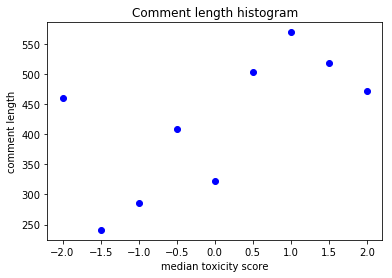

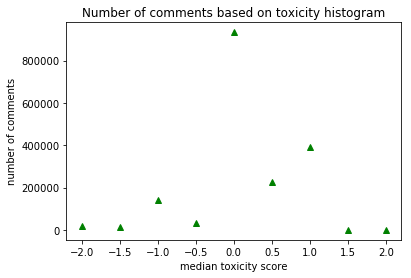

In [5]:
#group data based off rev_id and score

toxicity_dict = {};
comment_length_dict = {};

#intialize empty dict
for val in (set (toxicity_annotations_comments_df['median_score'])) : 
    toxicity_dict [str(val)] = toxicity_annotations_comments_df.loc[toxicity_annotations_comments_df['median_score']==val].size
    comment_length_dict[str(val)] = (toxicity_annotations_comments_df.loc[toxicity_annotations_comments_df['median_score']==float(val)]['comment_len']).mean()    

print ("toxicity hist is" + str(toxicity_dict))
print ("comment length hist is " + str(comment_length_dict))

#print (toxicity_annotations_comments_df.loc[toxicity_annotations_comments_df['median_score']==-0.6]['comment_len'].mean())

x,y = zip(*comment_length_dict.items())
plt.plot(x,y,'bo')
plt.ylabel('comment length')
plt.xlabel('median toxicity score')
plt.title("Comment length histogram")
plt.show()

w,z = zip(*toxicity_dict.items())
plt.plot(w,z,'g^')
plt.ylabel('number of comments')
plt.xlabel('median toxicity score')
plt.title("Number of comments based on toxicity histogram")
plt.show()

#--
#toxicity hist is{'-2.0': 1610, '-1.0': 12652, '0.0': 84913, '1.0': 35611, '2.0': 1, '0.5': 20784, '-0.5': 3004, '1.5': 11, '-1.5': 1100}
#comment length hist is {'-2.0': 459.8229813664596, '-1.0': 285.45882073980397, '0.0': 322.4702695700305, '1.0': 569.844345848193, '2.0': 0, '0.5': 0, '-0.5': 0, '1.5': 0, '-1.5': 0}


Merge the two tables (not used) 

In [6]:
#Merge the two panda tables
#toxicity_annotations_combined = pd.merge(toxicity_annotations_comments_df,toxicity_annotations_df,on='rev_id')
#display (toxicity_annotations_comments_df)

Running the stemmer

In [7]:
%%time
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords as sw
ps = PorterStemmer()

# set up regex expression to remove all but alpha chars and whitespace
regex = re.compile('[^a-zA-Z\s]') 

drop_stopwords = True # change this to False to keep stop words

# create set of stop words from nltk corpus
stopwords = set(sw.words('english'))

numsamples = toxicity_annotations_comments_df.comment.shape[0]

# transform each sample text:
stemmed_text = []
for text,i in zip(toxicity_annotations_comments_df.comment,range(numsamples)):
    # set to lower case
    text = regex.sub('',text.lower())
    # look at each word in text
    t = []
    for word in word_tokenize(text):
        if len(word) < 30: # drop "words" that are too long (otherwise stem crashes!)
            if not drop_stopwords or word not in stopwords: # drop stopwords
                t.append(ps.stem(word)) # stem the added word
    stemmed_text.append(" ".join(t)) # re-combine list of stemmed words
    if not i%5000: print(i,',', end="")

toxicity_annotations_comments_df["stemmed"] = pd.Series(np.array(stemmed_text)) # convert list of sample texts to pandas series


0 ,5000 ,10000 ,15000 ,20000 ,25000 ,30000 ,35000 ,40000 ,45000 ,50000 ,55000 ,60000 ,65000 ,70000 ,75000 ,80000 ,85000 ,90000 ,95000 ,100000 ,105000 ,110000 ,115000 ,120000 ,125000 ,130000 ,135000 ,140000 ,145000 ,150000 ,155000 ,CPU times: user 3min 45s, sys: 4.92 s, total: 3min 50s
Wall time: 3min 53s


In [8]:
toxicity_annotations_comments_df.head()   

,rev_id,comment,year,logged_in,ns,sample,split,mean_score,median_score,toxicity,comment_len,stemmed
0,2232.0,This: :One can make an analogy in mathematical...,2002,True,article,random,train,0.4,0.5,0,651,one make analog mathemat term envis distribut ...
1,4216.0,` :Clarification for you (and Zundark's righ...,2002,True,user,random,train,0.5,0.0,0,611,clarif zundark right check wikipedia bug page ...
2,8953.0,Elected or Electoral? JHK,2002,False,article,random,test,0.1,0.0,0,25,elect elector jhk
3,26547.0,`This is such a fun entry. Devotchka I once...,2002,True,article,random,train,0.6,0.0,0,2976,fun entri devotchka cowork korea couldnt tell ...
4,28959.0,Please relate the ozone hole to increases in c...,2002,True,article,random,test,0.2,0.0,0,197,pleas relat ozon hole increas cancer provid fi...


In [13]:
from explorer import FakeDataExplorer

In [14]:
test_df_columns = ['rev_id', 'year', 'mean_score', 'median_score', 'toxicity', 'comment_len']
test_df = toxicity_annotations_comments_df[test_df_columns]
#test_df.astype('float')
test_df.to_csv("test.csv")

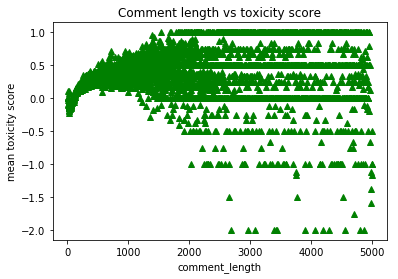

In [50]:
#test_df
grsummary = test_df.groupby(["comment_len"]).agg(np.mean)
#display(grsummary['median_score'])
dict1 = grsummary['median_score'].to_dict()
#print(dict1) 
w,z = zip(*dict1.items())
plt.plot(w,z,'g^')
plt.ylabel('mean toxicity score')
plt.xlabel('comment_length')
plt.title("Comment length vs toxicity score")
plt.show()


In [18]:
ex = FakeDataExplorer("test.csv")
ex.keys()

dict_keys(['rev_id', 'year', 'mean_score', 'median_score', 'toxicity', 'comment_len'])

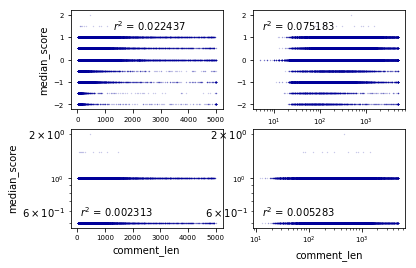

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [26]:
ex.scatter_plots("comment_len", "median_score")



In [ ]:
for i in range(0, 5000, 100):
    